Loading the file from the specified directory:

In [1]:
spectrum_file = open("/net/grouphome/ag-bittl/OPV/Ilia/Organic Batteries/Data/cwEPR_batteries/january/new_tube/full_tube.akku2")

Loading the measured values: magnetic field range, microwave frequency and lock-in data

In [2]:
for k in range(6):
    spectrum_file.readline()

bstart = float(spectrum_file.readline().split(" ")[2])
bstop =  float(spectrum_file.readline().split(" ")[2])
bstep =  float(spectrum_file.readline().split(" ")[2])

print("[start -> %.3f [step: %.3f]  %.3f <- stop] "%(bstart,bstep,bstop))

for k in range(20-13):
    spectrum_file.readline()
mw_frequency = float(spectrum_file.readline().split(" ")[2])
print("MW frequency: %.4f GHz"%(mw_frequency/1e9))

for k in range(3):
    spectrum_file.readline()

string = spectrum_file.readline()
values = string.split(" ")

#for k in range (len(values)): #here we make sure that we read correct values
#    print(values[k])


[start -> 3300.000 [step: 0.200]  3450.000 <- stop] 
MW frequency: 9.4036 GHz


Creating arrays for the magnetic field and for the signal:

In [3]:
import numpy as np
magnetic_field = np.arange(bstart,bstop+bstep,bstep) #here we create the magnetic field array
cwepr_signal = np.asarray(values[0:-1],dtype = float) #and here, the signal array

Fitting the baseline:

In [6]:
baseline_parameters = np.polyfit(magnetic_field, cwepr_signal, 0) #linear baseline
#print(baseline_parameters) #just to be sure we fit the baseline correctly
baseline = baseline_parameters[0] + (magnetic_field*0)#+ (magnetic_field*baseline_parameters[0]) #linear function
cwepr_signal_baseline_corrected = (cwepr_signal - baseline)
cwepr_signal_normalized = cwepr_signal_baseline_corrected * 2 / (max(cwepr_signal)-min(cwepr_signal))

Normalizing the magnetic field axis to 9.4 GHz

In [7]:
x_band_frequency = 9.4e9 #GHz
magnetic_field = magnetic_field*x_band_frequency/mw_frequency


Plotting the spectrum:

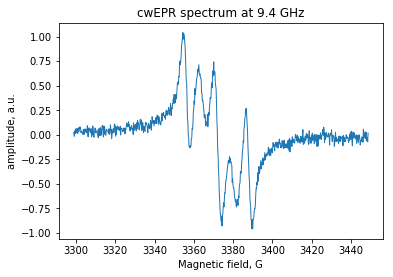

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

fig = plt.figure()
ax = fig.add_axes([0.15,0.15,0.75,0.75])
#ax.plot(magnetic_field,cwepr_signal)
ax.plot(magnetic_field,cwepr_signal_normalized, linewidth = 1.0)
#ax.plot(magnetic_field,baseline)
ax.set_title("cwEPR spectrum at 9.4 GHz")
ax.set_xlabel("Magnetic field, G")
ax.set_ylabel("amplitude, a.u.")
plt.show()

saving the plot:

In [12]:
#from matplotlib import savefig
fig.savefig('/net/grouphome/ag-bittl/OPV/Ilia/Organic Batteries/Data/cwEPR_batteries/january/plots/cell_16mm_out.pdf')